In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000

maxlen = 20 

(x_train , y_train) , (x_test , y_test) = imdb.load_data(num_words = max_features)
x_train = preprocessing.sequence.pad_sequences(x_train , maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test , maxlen = maxlen)

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)
print(x_train[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense , Embedding
print(x_train.shape)

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000 , 8 , input_length = maxlen))

# 3D 임베딩 텐서를 1D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1 , activation = "sigmoid"))
model.compile(optimizer = "rmsprop" , loss = "binary_crossentropy" , metrics = ["acc"])
model.summary()

history = model.fit(x_train , y_train ,
                   epochs = 10 ,
                   batch_size = 32 ,
                   validation_split = 0.2)

Init Plugin
Init Graph Optimizer
Init Kernel


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/Users/panhong/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/panhong/miniforge3/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

(25000, 20) (25000,)
(25000, 20) (25000,)
[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]
(25000, 20)
Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


2021-07-30 12:19:12.236475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-07-30 12:19:12.236567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-07-30 12:19:12.487291: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-30 12:19:12.487475: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-07-30 12:19:12.595677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
619/625 [============================>.] - ETA: 0s - loss: 0.6787 - acc: 0.5949

2021-07-30 12:19:16.706083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 5s 7ms/step - loss: 0.6783 - acc: 0.5962 - val_loss: 0.6413 - val_acc: 0.6906
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.5626 - acc: 0.7447 - val_loss: 0.5370 - val_acc: 0.7294
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4695 - acc: 0.7853 - val_loss: 0.5041 - val_acc: 0.7446
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4234 - acc: 0.8092 - val_loss: 0.4939 - val_acc: 0.7496
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3930 - acc: 0.8253 - val_loss: 0.4946 - val_acc: 0.7590
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3687 - acc: 0.8389 - val_loss: 0.4975 - val_acc: 0.7596
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3473 - acc: 0.8507 - val_loss: 0.5024 - val_acc: 0.7586
Epoch 8/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3270 - acc:

In [2]:
import os 

imdb_dir = "/Users/panhong/Desktop/coding_study/aclImdb/"

# os.path.join으로 파일에 접근
train_dir = os.path.join(imdb_dir , "train")

# 각각 긍정과 부정을 표현할 빈 리스트 , 긍 , 부정 판단을 도울 문장을 채울 빈 리스트를 생성
labels = []
texts = []

# neg , pos를 한번씩 label_type에 입력
for label_type in ["neg" , "pos"]:
    # os.path로 디렉토리에 접근해서 train_dir내에 label_type의 이름과 같은 
    # 디렉토리에 접근
    dir_name = os.path.join(train_dir , label_type)
    # neg 인지 pos지 확인
    print(dir_name)
    # fname로 dir_name으로 되어있는 디렉토리의 내용을 저장
    for fname in os.listdir(dir_name):
        # -4번째 파일의 확장자가 .txt이면 조건문 실행
        if fname[-4:] == ".txt":
            # 해당 txt파일을 열고 한글패치
            f = open(os.path.join(dir_name , fname) , encoding = "utf8")
            # 읽어온 내용(-4번째 .txt파일)을 상단에 설정해 놓은 texts에 저장
            texts.append(f.read())
            # 읽기 후 파일 close
            f.close()
            # label_type가 neg이면 0 , pos 면 1로 해서
            # labels에 append를 해줌
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)
                
# 
print(texts[0]) # 부정의 첫번째 문장
print(labels[0]) # 부정의 첫번째 label
print(texts[12500]) # 긍정의 첫번째 문장
print(labels[12500]) # 긍정의 첫번째 label

/Users/panhong/Desktop/coding_study/aclImdb/train/neg
/Users/panhong/Desktop/coding_study/aclImdb/train/pos
Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
0
For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.
1


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# 100개 단어 이후는 버림
maxlen = 100
# 훈련셋을 200개로 제한 
training_samples = 200
# 검증셋을 10,000개
validation_samples = 10000
# 데이터셋에서 가장 빈도높은 10,000개의 단어만 사용합니다.
max_words = 10000

# num_words를 빈도높은 10,000개의 단어로만 구성해서 
# 토큰화를 시켜줌
tokenizer = Tokenizer(num_words = max_words)
# 토큰화 시작
tokenizer.fit_on_texts(texts)
# 전 커널에서 저장되어 있던 texts를 시퀀스화 시켜줌
sequences = tokenizer.texts_to_sequences(texts)
# 시퀀스화 된 토큰들의 인덱스를 표시해줌
word_index = tokenizer.word_index
print("%s개의 고유한 토큰을 찾았습니다." %len(word_index))
# 단어를 100개로 제한 해두었기 때문에 100개 이후의 단어는 버림
data = pad_sequences(sequences , maxlen = maxlen)

88582개의 고유한 토큰을 찾았습니다.


In [17]:
# labels를 np.array로 형변환을 시켜줌
labels = np.asarray(labels)
print("데이터 텐서의 크기 : " , data.shape) 
print("레이블 텐서의 크기 : " , labels.shape)

indices = np.arange(data.shape[0])
# 긍정 부정을 합쳐서 섞음
np.random.shuffle(indices) 
# data가 섞임 indices와 같은 순서로  
data = data[indices]
# labels도 섞임 indices와 같은 순서로
labels = labels[indices]

# 훈련데이터를 생성해줌
# data에서 200개이하의 단어
x_train = data[:training_samples]
# labels는 긍정 , 부정을 나타내는 수를 가지고 있는 리스트
# 그중에서도 200개이하의 수를 가져옴
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

데이터 텐서의 크기 :  (25000, 100)
레이블 텐서의 크기 :  (25000,)


In [18]:
# 다운 받은 파일의 위치를 변수에 저장
glove_dir = "/Users/panhong/Desktop/coding_study/glove"
# embedding이라는 딕셔너리 생성
embeddings_index = {}
# os.path를 이용해서 해당 디렉토리내에 파일에 접근 후 한글패치
f = open(os.path.join(glove_dir , "glove.6B.100d.txt") , encoding = "utf8")
# 반복문 실행
for line in f:
    # 단어를 공백으로 각각 분류해줌
    values = line.split()
    # split을 이용해 구분해준 단어들을 저장
    word = values[0]
    # 1번째 이후의 값을 모두 실수형태로 불러옴(사실 원래 실수형태이지만)
    coefs = np.asarray(values[1:] , dtype = "float32")
    embeddings_index[word] = coefs
f.close()
print("%s개의 단어 벡터를 찾았습니다." %len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [21]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words , embedding_dim))
for word , i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , Flatten , Dense

# 모델 구성
model = Sequential()
model.add(Embedding(max_words , embedding_dim , input_length = maxlen))
model.add(Flatten())
model.add(Dense(32 , activation = "relu"))
model.add(Dense(1 , activation = "sigmoid"))
model.summary()
# layers 1번째 즉 embedding라인에 우리가 사전에 해놓았던 
# 데이터를 사용한다.
model.layers[0].set_weights([embedding_matrix])
# 기존에 작성한 레이어는 비활성화를 시켜준다.
# 중복해서 임베딩을 할경우 기존에 임베딩 되었던 데이터를 오염시킬수 있기 때문이다.
model.layers[0].trainable = False
model.compile(optimizer = "rmsprop" ,
             loss = "binary_crossentropy" ,
             metrics = ["acc"])
history = model.fit(x_train , y_train ,
                   epochs = 10 ,
                   batch_size = 32 ,
                   validation_data = (x_val , y_val))
# 가중치를 해당 디렉토리에 저장
model.save_weights("pre_trained_glove_model.h5")

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 3s 433ms/step - loss: 1.4927 - acc: 0.4900 - val_loss: 0.6934 - val_acc: 0.5023
Epoch 2/10
7/7 [==============================] - 3s 423ms/step - loss: 0.6491 - acc: 0.5800 - val_loss: 0.6959 

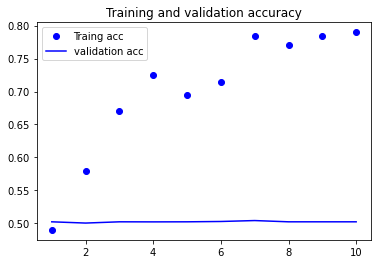

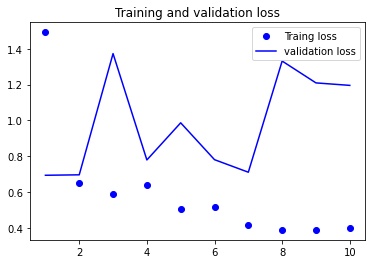

In [32]:
import matplotlib.pyplot as plt
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc , "bo" , label = "Traing acc")
plt.plot(epochs , val_acc , "b" , label = "validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , "bo" , label = "Traing loss")
plt.plot(epochs , val_loss , "b" , label = "validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()
